# 1-Librairies

In [18]:
# Standard
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
import kagglehub

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

# Division du dataset
from sklearn.model_selection import train_test_split

# Modèle de regression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Métriques de performance
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

# Optimisation du modèle testé
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats

# Suppression des warnings
import warnings
warnings.filterwarnings("ignore")

# 2-Dataset

In [19]:
# Charger les données
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")
df = pd.read_csv(f"{path}/brain_tumor_dataset.csv")


# 3- Analyse Exploratoire des Données (EDA)

## 3.1-Information sur les données

In [20]:
# Visualisation du dataset
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [21]:
# Supression de colonne inutile
df=df.drop('Patient_ID',axis=1)
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [22]:
# Information du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  20000 non-null  int64  
 1   Gender               20000 non-null  object 
 2   Tumor_Type           20000 non-null  object 
 3   Tumor_Size           20000 non-null  float64
 4   Location             20000 non-null  object 
 5   Histology            20000 non-null  object 
 6   Stage                20000 non-null  object 
 7   Symptom_1            20000 non-null  object 
 8   Symptom_2            20000 non-null  object 
 9   Symptom_3            20000 non-null  object 
 10  Radiation_Treatment  20000 non-null  object 
 11  Surgery_Performed    20000 non-null  object 
 12  Chemotherapy         20000 non-null  object 
 13  Survival_Rate        20000 non-null  float64
 14  Tumor_Growth_Rate    20000 non-null  float64
 15  Family_History       20000 non-null 

In [23]:
# Verification si donnéées manquantes
df.isnull().sum()

Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [36]:
# Vérifier les lignes en double
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Il y a {duplicate_rows} lignes en double dans le dataframe.")
else:
    print("Il n'y a pas de lignes en double dans le dataframe.")

Il n'y a pas de lignes en double dans le dataframe.


## 3.2-Valeurs Catégorielles

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    cardinality = df[col].nunique()
    print(f"Column: {col}, Cardinality: {cardinality}")

Column: Gender, Cardinality: 2
Column: Tumor_Type, Cardinality: 2
Column: Location, Cardinality: 4
Column: Histology, Cardinality: 4
Column: Stage, Cardinality: 4
Column: Symptom_1, Cardinality: 4
Column: Symptom_2, Cardinality: 4
Column: Symptom_3, Cardinality: 4
Column: Radiation_Treatment, Cardinality: 2
Column: Surgery_Performed, Cardinality: 2
Column: Chemotherapy, Cardinality: 2
Column: Family_History, Cardinality: 2
Column: MRI_Result, Cardinality: 2
Column: Follow_Up_Required, Cardinality: 2


## 3.3-Valeurs Numériques

Column: Age, Type: int64
Column: Tumor_Size, Type: float64
Column: Survival_Rate, Type: float64
Column: Tumor_Growth_Rate, Type: float64


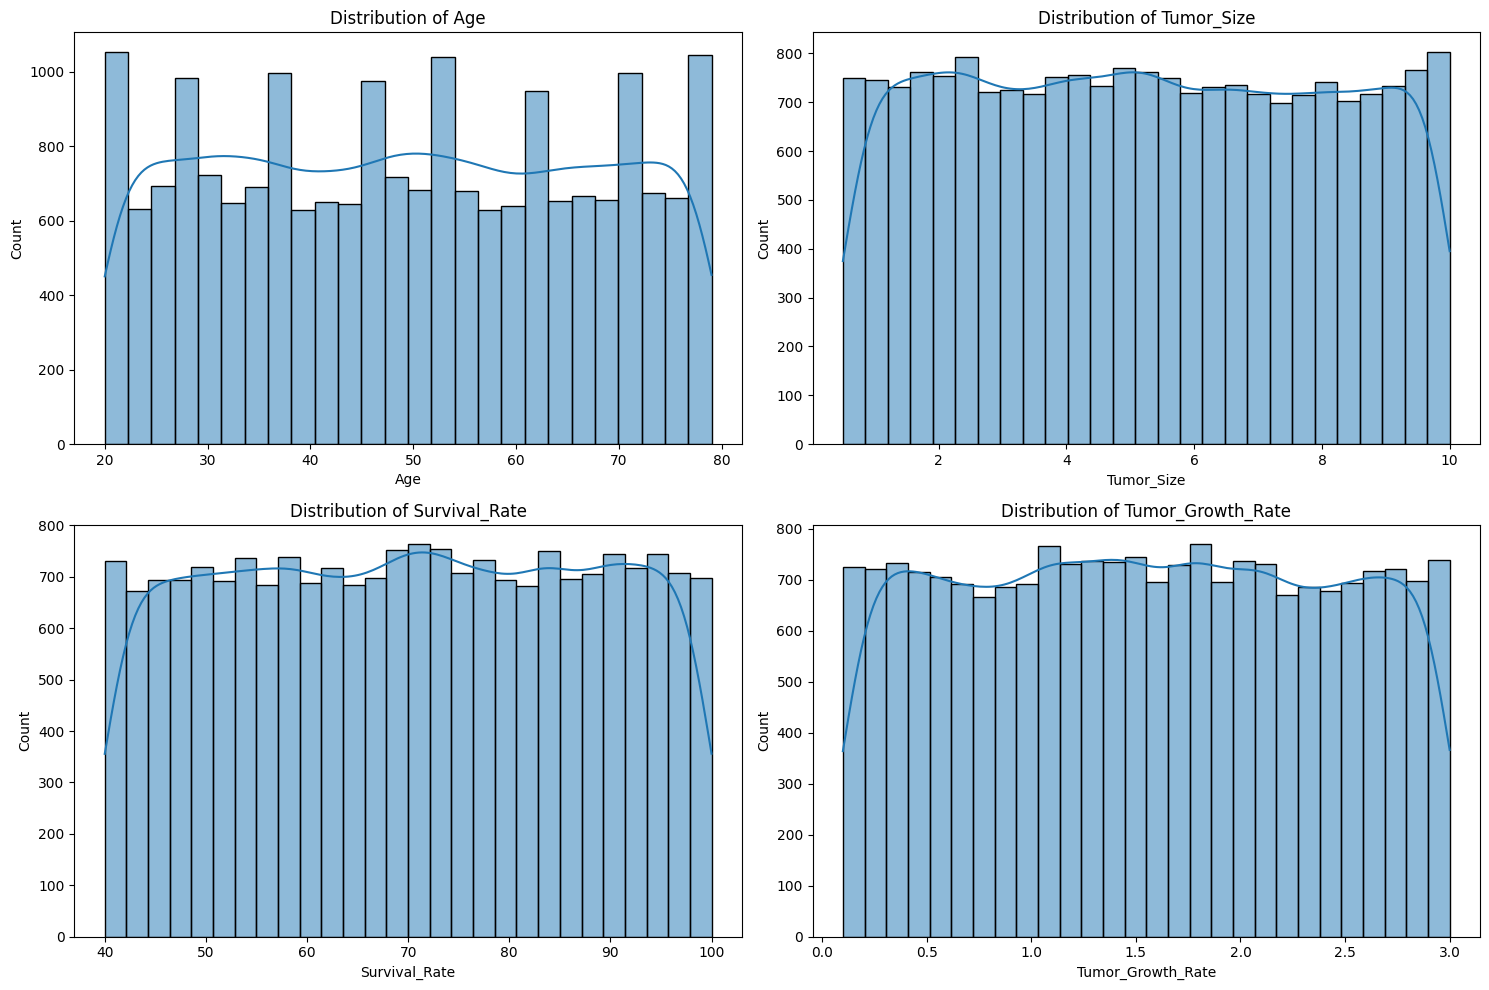

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    print(f"Column: {col}, Type: {df[col].dtype}")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 4-Preprocessing

## 4.1-OneHotEncoder sur les données Object

In [26]:
# Appliquer One-Hot Encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Afficher les premières lignes du DataFrame avec One-Hot Encoding
print("DataFrame after One-Hot Encoding:")
display(df_processed.head())

DataFrame after One-Hot Encoding:


,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Tumor_Type_Malignant,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,...,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes
0,73,5.375612,51.312579,0.111876,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,True
1,26,4.847098,46.373273,2.165736,True,False,False,True,False,True,...,False,True,False,False,True,True,True,True,True,True
2,31,5.588391,47.072221,1.884228,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,29,1.436600,51.853634,1.283342,True,True,False,False,True,False,...,False,False,False,False,True,False,True,True,False,False
4,54,2.417506,54.708987,2.069477,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,True,True


## 4.2-Features et Target

In [27]:
# Définir les Features (X) et la Target (y)
X = df_processed.drop('Survival_Rate', axis=1)
y = df_processed['Survival_Rate']

## 4.3-Split Train/Test

In [28]:
# Diviser les données en sous-ensemble d'entrainement et de test (sans stratification pour la régression)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

Dimensions de l'ensemble d'entraînement (X_train, y_train): (14000, 29) (14000,)
Dimensions de l'ensemble de test (X_test, y_test): (6000, 29) (6000,)


## 4.4-StandardsScaler sur les données Features numériques du df_processed

In [29]:
# Mise a l'echelle des features numériques
# Identifier les colonnes numériques à scaler (exclure les colonnes booléennes créées par one-hot encoding)
numerical_cols_to_scale = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# Afficher les premières lignes des données mises à l'échelle
print("\nPremières lignes de X_train après mise à l'échelle:")
display(X_train.head())


Premières lignes de X_train après mise à l'échelle:


,Age,Tumor_Size,Tumor_Growth_Rate,Gender_Male,Tumor_Type_Malignant,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,Histology_Medulloblastoma,...,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes
17218,1.123637,-1.366742,0.251493,True,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,True
15188,1.410193,-1.451946,0.908539,True,True,False,False,True,True,False,...,True,False,False,False,True,False,True,True,False,True
11295,-1.054184,0.037374,1.342113,True,False,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,True
19772,-0.939562,-1.709175,-0.032340,True,False,False,False,False,False,True,...,False,False,False,False,False,True,True,True,False,False
13072,0.263971,-0.189811,1.614366,True,True,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,True


# 5-Entraînement et évaluation


## 5.1-Modeles

In [30]:
models = {
    'LinearRegression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor' : SVR(),
    'KNN': KNeighborsRegressor(),
}

## 5.2-Entrainements et résultats

In [31]:
# Creer un dictionnaire pour stocker les résultats
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    # Train the models
    model.fit(X_train, y_train)

    # Predict on the Test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    accuracy = 100 - mape

    # Store the metrics in the results dictionary
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': accuracy
    }

    # Print performance metrics
    print(f"Performance de {name}:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.2f}%\n")


Training LinearRegression...
Performance de LinearRegression:
Mean Absolute Error: 14.9720
Mean Squared Error: 299.5927
R^2 Score: -0.0031
Accuracy: 76.40%

Training Decision Tree...
Performance de Decision Tree:
Mean Absolute Error: 20.2618
Mean Squared Error: 611.7071
R^2 Score: -1.0481
Accuracy: 68.57%

Training Random Forest...
Performance de Random Forest:
Mean Absolute Error: 15.0814
Mean Squared Error: 306.6496
R^2 Score: -0.0267
Accuracy: 76.23%

Training Support Vector Regressor...
Performance de Support Vector Regressor:
Mean Absolute Error: 14.9766
Mean Squared Error: 301.3655
R^2 Score: -0.0090
Accuracy: 76.36%

Training KNN...
Performance de KNN:
Mean Absolute Error: 16.0204
Mean Squared Error: 361.8174
R^2 Score: -0.2114
Accuracy: 74.88%



# 6-OPtimsation

## 6.1-Parametres

In [32]:
# Récupération des paramètres pour chaque modèle
for model_name, model in models.items():
    print(f"Paramètres de {model_name}:")
    print(model.get_params())
    print("-" * 50)

Paramètres de LinearRegression:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
--------------------------------------------------
Paramètres de Decision Tree:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
--------------------------------------------------
Paramètres de Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
------------------------------------------------

In [33]:
params_grid = {
    "LinearRegression": {'copy_X': [True,False], 'fit_intercept': [True,False], 'positive': [True,False]},
    "Decision Tree": {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20]},
    "Support Vector Regressor": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {'n_neighbors': [3, 5, 10, 20],'weights': ['uniform', 'distance'],'p': [1, 2]}
}

## 6.2 Entrainements et résultats

In [34]:
results_grid = {}

for name, model in models.items():
    # Entrainement des modeles avec GridSearchCV
    grid_search = GridSearchCV(
        estimator=models[name],
        param_grid=params_grid[name],
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    y_pred_grid = grid_search.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - (mape*100)

    results_grid[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': accuracy
    }
    
    # Affichage des performances
    print(f"Performance de {name}:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.2f}%\n")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Performance de LinearRegression:
Mean Absolute Error: 16.0204
Mean Squared Error: 361.8174
R^2 Score: -0.2114
Accuracy: 74.88%

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Performance de Decision Tree:
Mean Absolute Error: 16.0204
Mean Squared Error: 361.8174
R^2 Score: -0.2114
Accuracy: 74.88%

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Performance de Random Forest:
Mean Absolute Error: 16.0204
Mean Squared Error: 361.8174
R^2 Score: -0.2114
Accuracy: 74.88%

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Performance de Support Vector Regressor:
Mean Absolute Error: 16.0204
Mean Squared Error: 361.8174
R^2 Score: -0.2114
Accuracy: 74.88%

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Performance de KNN:
Mean Absolute Error: 16.0204
Mean Squared Error: 361.8174
R^2 Score: -0.2114
Accuracy: 74.88%



In [ ]:
# Meilleur modèle sans optimisation
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = results[best_model_name]

print(f"Meilleur modèle avant optimisation: {best_model_name}")
print(f"MSE: {best_model['MSE']:.4f}")
print(f"R2: {best_model['R2']:.4f}")

# Meilleur modèle apres optimisation avec GridSearch
best_model_name_grid = max(results_grid, key=lambda k: results_grid[k]['R2'])
best_model_grid = results_grid[best_model_name_grid]

print(f"Meilleur modèle apres optimisation: {best_model_name_grid}")
print(f"MSE: {best_model_grid['MSE']:.4f}")
print(f"R2: {best_model_grid['R2']:.4f}")